In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
%matplotlib inline
errors='coerce'

In [2]:
df = pd.read_csv('./analysis/BTC.csv')
df.drop(columns='Unnamed: 0', inplace=True)

In [3]:
df = df.rename(index=str, columns={"votes_disliked": "dislike",
                              "votes_important": "important",
                              "votes_liked": "liked",
                              "votes_lol": "lol",
                              "votes_negative": "bearish",
                              "votes_positive": "bullish",
                              "votes_saved": "saved",
                              "votes_toxic": "toxic"})

In [4]:
df['user_sent_opinions'] = df['bearish'] + df['bullish']

df['bullishness'] = ((df['bullish'] / df['user_sent_opinions']) * 100)

df['bearishness'] = -((df['bearish'] / df['user_sent_opinions']) * 100)

In [5]:
df.drop(list(df.filter(regex = 'isUp_')), axis = 1, inplace = True)

In [6]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)
df = df.replace(np.nan, 0)

In [7]:
# create a list of target cols for predictions

target_cols = ['dislike', 'important',
       'liked', 'lol', 'bearish', 'bullish',
       'saved', 'toxic']

In [8]:
# and seperate the dataframes 

targets = df[target_cols]

X_features = df.drop(columns=target_cols)

In [9]:
X_features.drop(columns=['date_time','bullishness', 'bearishness', 'user_sent_opinions'], inplace=True)

In [10]:
X_features.head()

,title_smog_score,description_smog_score,title_coleman_liau_score,description_coleman_liau_score,title_polarity,title_subjectivity,description_polarity,description_subjectivity,domain__@Bitcoin,domain__@ErikVoorhees,...,close_12,close_24,is_Friday,is_Monday,is_Saturday,is_Sunday,is_Thursday,is_Tuesday,is_Wednesday,is_nan
0,11.208143,11.602472,20.663000,13.085088,0.0,0.1,0.100000,0.372222,0.0,0.0,...,6968.36,6883.74,0,0,0,1,0,0,0,0
1,8.841846,9.945662,13.456761,9.003663,-0.1,0.5,0.092676,0.474950,0.0,0.0,...,6981.57,6988.87,0,1,0,0,0,0,0,0
2,3.129100,14.554593,5.998571,12.545714,0.0,0.0,0.400000,0.366667,0.0,0.0,...,6710.39,6804.50,0,0,0,0,0,1,0,0
3,11.208143,12.457976,26.498000,10.168793,0.0,0.0,0.000000,0.591667,0.0,0.0,...,6789.53,6764.20,0,0,0,0,0,1,0,0
4,3.129100,10.686353,0.108571,9.854655,0.5,0.5,0.019481,0.176500,0.0,0.0,...,6779.03,6764.38,0,0,0,0,0,1,0,0


In [11]:
targets['user_sent_opinions'] = targets['bearish'] + targets['bullish']

/Users/roseporter/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
targets['bullishness'] = ((targets['bullish'] / targets['user_sent_opinions']) * 100)

# targets['bearishness'] = -((targets['bearish'] / targets['user_sent_opinions']) * 100)

/Users/roseporter/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
# I want to to decide if the post was flagged as primarly bullish or bearish

targets['is_bullish'] = np.where(targets['bullishness'] >= 60, 1, 0)

/Users/roseporter/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [14]:
targets.drop(columns=['bullishness', 'bullish', 'bearish'], inplace=True)

/Users/roseporter/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [15]:
targets.head()

,dislike,important,liked,lol,saved,toxic,user_sent_opinions,is_bullish
0,2.0,19.0,18.0,1.0,3.0,0.0,26.0,1
1,0.0,15.5,14.5,1.0,3.0,0.0,26.0,1
2,2.0,12.0,16.0,4.0,4.0,0.0,21.0,1
3,0.0,5.0,6.0,0.0,3.0,0.0,7.0,1
4,0.0,3.0,3.0,0.0,3.0,0.0,3.0,1


In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
print(dir(RandomForestClassifier()))
print(RandomForestClassifier())

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_estimator_type', '_get_param_names', '_make_estimator', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'base_estimator', 'bootstrap', 'class_weight', 'criterion', 'decision_path', 'estimator_params', 'feature_importances_', 'fit', 'get_params', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators

# Predict on '***is_bullish***'

## RandomForestClassifier with Cross-Validation

In [18]:
from sklearn.model_selection import KFold, cross_val_score

In [19]:
rf = RandomForestClassifier(n_jobs=-1)

k_fold = KFold(n_splits=5)

cross_val_score(rf, X_features, targets['is_bullish'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.67256637, 0.66371681, 0.68141593, 0.6875    , 0.76785714])

## RandomForestClassifier with Fscore

In [20]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test =  train_test_split(X_features, targets['is_bullish'], test_size=0.2)

In [22]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [23]:
most_imp_feats = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:20])

In [24]:
y_pred = rf_model.predict(X_test)

In [25]:
precision, recall, fscore, support = score(y_test, y_pred, average='binary')

In [26]:
print('Precision: {} / Recall: {} / Accuracy {}'.format(round(precision, 3),
                                                   round(recall, 3),
                                                   round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 0.786 / Recall: 0.88 / Accuracy 0.761


In [32]:
print('Precision show that when the Random Forest Classifier identified an article as Bullish it was Bullish {}% of the time.'
      .format(round((precision*100), 1)))

print('Recall shows that of all of the bullish articles {}% where identified by the Random Forest Classifier.'
      .format(round((recall)*100, 1)))

print('Accuracy show that of all the articles the Random Forest Classifier predicted them to be bullish correctly {}% of the time.'
      .format(round(round((y_pred==y_test).sum() / len(y_pred),3)*100),1))



Precision show that when the Random Forest Classifier identified an article as Bullish it was Bullish 78.6% of the time.
Recall shows that of all of the bullish articles 88.0% where identified by the Random Forest Classifier.
Accuracy show that of all the articles the Random Forest Classifier predicted them to be bullish correctly 76.0% of the time.


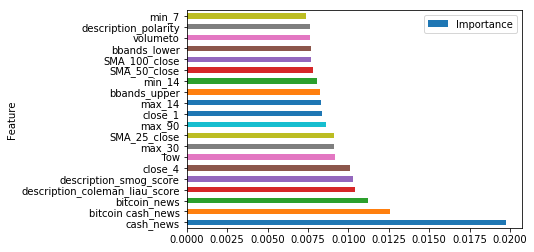

In [28]:
most_imp_feats = most_imp_feats.rename(index=str, columns={0: "Importance",
                                                           1: "Feature"})

#most_imp_feats.set_index('Feature', inplace=True)

most_imp_feats.plot.barh(x='Feature', y="Importance");